<a href="https://colab.research.google.com/github/bob8dod/NLP_SelfStudying/blob/main/Word_Local_Representation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

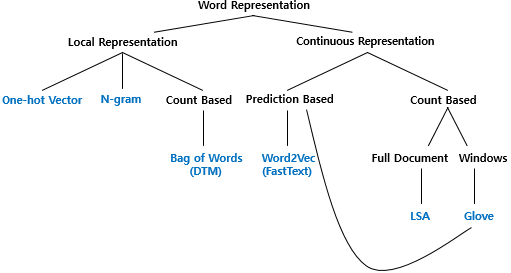

# 카운트 기반의 단어 표현 (Local Representation)

In [ ]:
! pip install konlpy

     |████████████████████████████████| 19.4 MB 1.3 MB/s 
     |████████████████████████████████| 448 kB 26.7 MB/s 
     |████████████████████████████████| 86 kB 5.2 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


## BoW(Bag of Words)


주로 어떤 단어가 얼마나 등장했는지를 기준으로 문서가 어떤 성격의 문서인지를 판단하는 작업에 쓰임
1.   우선, 각 단어에 고유한 정수 인덱스를 부여
2.   각 인덱스의 위치에 단어 토큰의 등장 횟수를 기록한 벡터 생성



### 직접 짜보기 _ method 이용 X

In [ ]:
from konlpy.tag import Okt #from konlpy.tag import Mecab
import re
okt = Okt()

stopwords = ['가', '이랑', '는', '이', '네요']
text = '제가 맡는 향이랑 남편이 맡는 향이랑 다르다네요'
token = okt.morphs(text)
token = [w for w in token if w not in stopwords] #불용어 제거
word2idx = {} #위치로 정수 인덱싱하기 위한 
BoW=[] #단어별 count를 기록하기 위한
i = 0
for word in token:
    if word not in word2idx.keys():
        word2idx[word] = i
        i += 1
        BoW.insert(len(word2idx)-1, 1)  #해당 인덱스에  1을 추가함
    else:
        idx = word2idx.get(word) #Key로 Value얻기 _ 여기서 value가 index역할을 함
        BoW[idx] += 1
print(word2idx)
print(BoW)

{'제': 0, '맡는': 1, '향': 2, '남편': 3, '다르다네요': 4}
[1, 2, 2, 1, 1]


### CountVecectorizer Mehtod 이용

! 영어만 지원 !  
! 한국어에 CountVectorizer를 적용하면, 조사 등의 이유로 제대로 BoW가 만들어지지 않음 !

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = ['제가 맡는 향이랑 남편이 맡는 향이랑 다르다네요']
vector = CountVectorizer()
print(vector.fit_transform(corpus).toarray()) # 코퍼스로부터 각 단어의 빈도 수를 기록한다.
print(vector.vocabulary_) # 각 단어의 인덱스가 어떻게 부여되었는지를 보여준다.

[[1 1 2 1 2]]
{'제가': 3, '맡는': 2, '향이랑': 4, '남편이': 0, '다르다네요': 1}


## TF-IDF(Term Frequency-Inverse Document Frequency) (+ DTM)

### 직접 짜보기_method 이용x

In [ ]:
import pandas as pd
from math import log
from konlpy.tag import Okt #from konlpy.tag import Mecab
import re
from tensorflow.keras.preprocessing.text import Tokenizer
okt = Okt()

In [ ]:
data = pd.read_csv('/content/after.csv')
data = data[['Unnamed: 0','2']]
data.columns=['idx','review']

In [ ]:
def preprocessing(review_data):
    for i in range(len(review_data)):
        review_data.loc[i, 'review'] = re.sub('[^0-9가-힣\s]','', review_data.loc[i, 'review'])
        # review_data.loc[i, 'review'] = re.sub(' ', np.nan, review_data.loc[i, 'review'])
        # review_data.loc[i, 'review'] = spacing(review_data.loc[i, 'review'])
    review_data = review_data.dropna().reset_index(drop=True)
    return review_data

def okt_tokenizer(review_data):
    # stopwords = ['이','가','으로','에게','에게서','에서','부터','까지','한테','께','와','과','을','를','의','로서','로']
    review_data_list=[]
    for i in range(len(review_data)):
        rev = okt.morphs(review_data.loc[i, 'review'])
        # review_data_list.append([w for w in rev if w not in stopwords])
        review_data_list.append(rev)
    return review_data_list

def tokenization(review_data_list):
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(review_data_list)
    return tokenizer

def return_nouns(review_data):
    nouns=[]
    for i in range(len(review_data)):
        noun = okt.pos(review_data.loc[i, 'review'])
        f_noun = [w for w,v in noun if v=='NNG']  # or v=='VV' or v=='VX' or v='VA 
        nouns.append(f_noun)
    return nouns

def count_noun(nouns):
    vocab = dict()
    result=[]
    for words in nouns:
        result.append(words)
        for word in words:
            if word not in vocab:
                vocab[word] = 1
            else:
                vocab[word] += 1
    vocab_sorted = sorted(vocab.items(), key= lambda x:x[1], reverse=True)
    return vocab_sorted


In [ ]:

review_data = preprocessing(data) # 전처리
review_data_list = okt_tokenizer(review_data) # 형태소 토큰화
tokenizer = tokenization(review_data_list) # 정수인덱싱
nouns = return_nouns(review_data) # 명사 추출
vocab_sorted = count_noun(nouns) # 명사 키워드 
print(vocab_sorted) #count기반 키워드 추출

[]


In [ ]:
def preprocessing(review_data):
    for i in range(len(review_data)):
        review_data.loc[i, 'review'] = re.sub('[^가-힣\s]','', review_data.loc[i, 'review'])
        # review_data.loc[i, 'review'] = re.sub(' ', np.nan, review_data.loc[i, 'review'])
        # review_data.loc[i, 'review'] = spacing(review_data.loc[i, 'review'])
    review_data = review_data.dropna().reset_index(drop=True)
    return review_data

data = preprocessing(data)

docs = []
for i in range(len(data)):
    docs.append(data.loc[i,'review'])

docs

['원래 쓰던거 재구매했는데 저렴하게 산거 같아서 만족합니당 배송도 바로 해주셔서 빨리 받았어요 ',
 '배송빨랐고 오래 뒀다가 뿌렸는데 향 좋아요',
 '예전부터 사고싶엇던 향수드뎌 저렴한 가격으로 구입햇네여배송도 빛의속도고 향도병도 고급스럽네여',
 '고급진 케이스에 들어있어서 선물용으로도 좋고 향이 넘넘 좋네요',
 '은은하고 시원하고 좋아요 강한거 싫어 하시는 분에게 딱이요',
 '잔향이오래가는데진짜진국향이에여글서이번에병이나주문햇어여향두오래가구진짜찐입니당',
 '선물용으로샀어요 후기가좋은만큼 좋아했으면좋겠네요 겉비닐포장이있어서 더맘에들어요',
 '여름이면 찾게되내요쉬원하고 은은해서 좋아요',
 '맡아본적없이사려니좀불안햇는데오자마자뿌려보고너무반해엘리자베스레드도다시또구매햇오여',
 '매우 만족합니다 또 재구매 한 거예요  입니다',
 '향이그닥제가생각햇던건아니네여남자향수냄새같기도하구',
 '선물용으로 구입했는데만족스러운듯합니다',
 '향 지속력이 약해요',
 '향도 오래가고 좋습니다',
 '저렴하게샀어요 넘조아요',
 '재가좋아하는향수에요',
 '냄새너무좋구상큼해여',
 '설날이 껴서 설 지나고 받을 줄 알았는데 금방 받아서 좋아요 향은 항상 쓰던 청포도향 그대로고 싱그러워서 시원한 초여름 아침 시가 생각나네요 원래 얘는 향 지속력이 좋지는 않아서 시간 정도 갈거같아요 좋은 상품 뽁뽁이에 싸주셔서 감사하고 빠른 배송 감사합니다 쇼핑백은 나중에 쓸게요',
 '행사해서 저렴하게구매했어요 대부터 쭈욱사용 하던향수 정품 이라고되어서 믿고 구매했어요 정품이맞아요 향도 똑같고 오래가요 다른향수도 같이주문했는데 다좋아요 앞으론 향수는이곳에서 쭈욱 구매할께요',
 '너무진하지 않고 은은하게 좋구가격 대비 용량이 많아서 너무 마음에 들어요 배송도 빠르고 포장도 꼼꼼하게 되어서 왔구요 뒷면 제품 설명서도 자세이보니 제조국이 스페인 이라고 기입되어 있습니다',
 '쿠폰 덕분에 저렴하게 구매했습니다 단종된 불가리 블랙과   주문 했네요 추억의 향기네요 넉넉한 양으로 오랫동안 쓸

In [ ]:
# docs = ['저렴하게 구매 해서 좋았어요 다음에 또 구매 할 생각입니다',
#         '저렴하게 구매 해서 그런지 좋네요',
#         '늘쓰던거라 향도 좋고 오래가네요',
#         '향도 좋구 저렴한 가격에 잘 구매했어용',
#         '향도 마음에 들고 저렴하게 잘 산것 같아요']

# docs = [
#   '먹고 싶은 사과',
#   '먹고 싶은 바나나',
#   '길고 노란 바나나 바나나',
#   '저는 과일이 좋아요'
# ] 
vocab = list(set(w for doc in docs for w in okt.morphs(doc))) #문서에 나오는 각 단어 저장 (중복제거 )
vocab.sort() #한글 순으로 정렬

In [ ]:
# TF, IDF , TF-IDF 수식 함수로 정의

N = len(docs) 
# 특정 문서 d에서의 특정 단어 t의 등장 횟수
def tf(t, d): 
    return d.count(t)

# df(t)에 반비례하는 수. / df(t) : 특정 단어 t가 등장한 문서의 수.
def idf(t):
    df = 0
    for doc in docs:
        if t in doc:
            df += 1
    return log(N/(df+1))
     # 만약 N이 4이고 df가 3이라면 idf값은 0이 되어버려서 가중치 역할을 못함
     # 그래서 log(N/(df+1))+1 하는 경우도 있음 -> 사이킷런의 방식

# tf와 idf의 곱
def tfidf(t, d):
    return tf(t,d)* idf(t)

In [ ]:
#DTM을 데이터프레임에 저장하여 출력
result = []
for i in range(N): # 각 문서에 대해서 아래 명령을 수행
    result.append([])
    d = docs[i]
    for j in range(len(vocab)):
        t = vocab[j]        
        result[-1].append(tf(t, d))

tf_ = pd.DataFrame(result, columns = vocab)
tf_

,가,가게,가격,가고,가구,가까이,가깝고,가끔,가내,가네여,가네요,가는,가는거,가는것,가는데,가능하고,가능하다하여,가능할것,가더,가더라고,가던데,가득,가득한,가로,가모,가방,가벼운,가벼워서,가볍게,가볍고,가볍지도,가봐요,가분,가서,가성,가스,가시면서,가왜,가요,가을,...,확,확실하게,확실하겟죠,확실하네요,확실한,확인,회사,효과,횻,후,후각,후기,후반,후시,후회,훨,훨싸,훨씬,훼손,휴대,흔,흔들려서,흔들렸는지,흔들렸을거라,흔들리지,흔들림,흔하게,흔하지,흔한,흔해져,흔히,흘러내렸으나,흠,흠잡히지,히,힐링,힐튼,힘겹게,힘든시기,힘들죠
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1081,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1082,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1083,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1084,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# 각 단어에 대한 IDF 값
result = []
for j in range(len(vocab)):
    t = vocab[j]
    result.append(idf(t))

idf_ = pd.DataFrame(result, index = vocab, columns = ["IDF"])
idf_

,IDF
가,0.678522
가게,6.297109
가격,1.380785
가고,3.694420
가구,5.044346
...,...
힐링,5.891644
힐튼,5.891644
힘겹게,6.297109
힘든시기,6.297109


In [ ]:
result = []
for i in range(N):
    result.append([])
    d = docs[i]
    for j in range(len(vocab)):
        t = vocab[j]

        result[-1].append(tfidf(t,d))

tfidf_ = pd.DataFrame(result, columns = vocab)
tfidf_

In [ ]:
# list(filter(lambda x: x>0.4, tfidf_.mean(axis=0) )) #result = filter(is_even, target)
rr = tfidf_.mean(axis=0)
rr = pd.DataFrame(rr).reset_index()
rr.columns=['word','value']
ss = rr.sort_values(by=['value'], ascending=False).reset_index(drop=True)
for i in range(len(ss)):
    if len(ss.loc[i,'word']) >=2 and  okt.pos(ss.loc[i,'word'])[0][1]=='Noun':
        print(ss.loc[i,'word'], end= ' ')

휴지 제품 화장 사용 구매 화장지 가격 배송 저렴 주문 길이 만족 구입 라벤더 가성 상품 먼지 다른 화장실 해요 두께 생각 대비 느낌 정도 쓰기 하니 포장 지도 그냥 라서 흡수 비닐 아주 감겨 편이 보고 할인 감사 도톰 조금 품질 쿠폰 안나 용으로 매하 비교 이번 용해 차이 기존 질도 마트 다가 재질 리빙 다음 고요 항상 처음 하나 걱정 어져 실용 다시 인지 미터 면서 여기 행사 계속 향기 이건 양도 이나 수도 거의 일단 택배 동안 적당 슈퍼 고급 이제 약간 후기 한번 리뷰 더니 기도 정말 부담 별로 매우 문제 문해 진짜 묶음 상태 좀더 이지 금방 여러 만큼 아보 도착 보이 아무 여서 마음 티슈 역시 용량 나름 날림 대로 번가 확인 우선 부터 용도 취소 처럼 중이 신경 이정 형광 바로 기분 보통 기사 리가 판매 이용 기대 자주 박스 브랜드 두루 땡큐 사서 물건 연락 흐물 보지 거나 부분 요즘 최고 완전 도로 크리넥스 마리 예전 전혀 재생 냄새 높이 만해 듭니 문자 다만 벌써 지난 매번 또한 크기 회사 가로 이상 안해 추천 펄프 마다 의사 물티슈 무형 시기 는걸 드네 미리 부피 고가 원래 잘못 처리 한지 폭도 지금 사진 벤다 특가 랍니 데이 어디 지네 무게 자마자 삼정 보기 만하 사면 이유 듯해 향기도 이구 경비실 무난 가요 시간 거기 현관 월요일 두툼 식구 엠보 소비 나니 해도 얼마 화요일 편입 때문 최악 소모 무향 종이 기전 동네 오늘 제조 지난번 전이 살짝 라면 강아지 달라 질감 절대 강추 지안 저번 발송 사제품 오물 부드러움 양은 현재 센터 시작 원정 경우 생필품 작성 생필 용감 음날 완료 여태 용이 어쨌든 예정 왼쪽 언제 오른쪽 오히려 어차피 마침 크게 미용 쇼핑 직접 지인 경제 전부 변기 전화 지기 사고 사가 수고 시중 결과 촘촘 촉감 작고 무엇 그것 가족 그대로 피부 가지 단점 가루 하루 딜떠 가정 두번째 넓이 기준 주로 아들 요기 성해 대박 살수 단면 크리미 표면 재주 신청 가끔 번창 짜증 부모님 물류 헤프 헐렁 고생 두운 고민 워낙 비도 둘째 나

### 사이킷런 method 이용

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = [
    'you know I want your love',
    'I like you',
    'what should I do ',    
]
vector = CountVectorizer()
print(vector.fit_transform(corpus).toarray()) # 코퍼스로부터 각 단어의 빈도 수를 기록한다.
print(vector.vocabulary_) # 각 단어의 인덱스가 어떻게 부여되었는지를 보여준다.

[[0 1 0 1 0 1 0 1 1]
 [0 0 1 0 0 0 0 1 0]
 [1 0 0 0 1 0 1 0 0]]
{'you': 7, 'know': 1, 'want': 5, 'your': 8, 'love': 3, 'like': 2, 'what': 6, 'should': 4, 'do': 0}


In [ ]:
# IDF의 로그항의 분자에 1을 더해주며, 로그항에 1을 더해주고,
# TF-IDF에 L2 정규화라는 방법으로 값을 조정하는 등의 차이 존재
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = [
    'you know I want your love',
    'I like you',
    'what should I do ',    
]
tfidfv = TfidfVectorizer().fit(corpus)
print(tfidfv.transform(corpus).toarray())
print(tfidfv.vocabulary_)

[[0.         0.46735098 0.         0.46735098 0.         0.46735098
  0.         0.35543247 0.46735098]
 [0.         0.         0.79596054 0.         0.         0.
  0.         0.60534851 0.        ]
 [0.57735027 0.         0.         0.         0.57735027 0.
  0.57735027 0.         0.        ]]
{'you': 7, 'know': 1, 'want': 5, 'your': 8, 'love': 3, 'like': 2, 'what': 6, 'should': 4, 'do': 0}
